In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics

In [2]:
file_path = '../network_segmentation/X-IIoTID_dataset.csv' 

traffic_data = pd.read_csv(file_path)

traffic_data.head()

C:\Users\framatome\AppData\Local\Temp\ipykernel_7268\136307448.py:3: DtypeWarning: Columns (1,3,5,12,24) have mixed types. Specify dtype option on import or set low_memory=False.
  traffic_data = pd.read_csv(file_path)


,Date,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Protocol,Service,Duration,Scr_bytes,...,OSSEC_alert_level,Login_attempt,Succesful_login,File_activity,Process_activity,read_write_physical.process,is_privileged,class1,class2,class3
0,9/01/2020,1578540956,192.168.2.199,49278,192.168.2.10,80,tcp,http,0.67369,13437,...,5,0,0,0,0,0,0,Scanning_vulnerability,Reconnaissance,Attack
1,13/01/2020,1578871873,10.0.1.5,39769,131.236.3.92,53,udp,dns,0.000083,78,...,0,0,0,0,0,0,0,Normal,Normal,Normal
2,9/01/2020,1578522486,172.24.1.80,59050,172.24.1.1,53,udp,dns,0.000132,38,...,0,0,0,0,0,0,0,Normal,Normal,Normal
3,27/02/2020,1582757640,192.168.2.196,37966,192.168.2.10,1880,tcp,websocket,9.378481,1121,...,0,1,1,1,1,1,1,Normal,Normal,Normal
4,16/12/2019,1576452612,172.24.1.80,38233,172.24.1.1,53,udp,dns,0.000074,-,...,0,0,0,0,0,0,0,Normal,Normal,Normal


In [51]:
mydata = traffic_data.drop(columns=['Std_user_time','Avg_nice_time', 'Std_nice_time','Std_system_time','Std_iowait_time', 'Avg_ideal_time',
       'Std_ideal_time', 'Avg_tps', 'Std_tps','Std_rtps','Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused','Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s',
       'std_num_cswch/s','File_activity', 'Process_activity','read_write_physical.process', 'class1', 'class2'])

In [53]:
mydata.head()

,Date,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Protocol,Service,Duration,Scr_bytes,...,Avg_system_time,Avg_iowait_time,Avg_rtps,Avg_wtps,OSSEC_alert,OSSEC_alert_level,Login_attempt,Succesful_login,is_privileged,class3
0,9/01/2020,1578540956,192.168.2.199,49278,192.168.2.10,80,tcp,http,0.67369,13437,...,4.864,0.311,8,4.297,1,5,0,0,0,Attack
1,13/01/2020,1578871873,10.0.1.5,39769,131.236.3.92,53,udp,dns,0.000083,78,...,3.778,2.741,0,6.6,0,0,0,0,0,Normal
2,9/01/2020,1578522486,172.24.1.80,59050,172.24.1.1,53,udp,dns,0.000132,38,...,1.693,2.423,30.1,7.3,0,0,0,0,0,Normal
3,27/02/2020,1582757640,192.168.2.196,37966,192.168.2.10,1880,tcp,websocket,9.378481,1121,...,3.941,0.509,23.3,5.7,0,0,1,1,1,Normal
4,16/12/2019,1576452612,172.24.1.80,38233,172.24.1.1,53,udp,dns,0.000074,-,...,2.415,1.803,0.1,9.7,0,0,0,0,0,Normal


In [4]:
mydata.isna().sum()

Date                 331
Timestamp            297
Scr_IP                 0
Scr_port               0
Des_IP                 0
Des_port               0
Protocol               0
Service                0
Duration               0
Scr_bytes              0
Des_bytes              0
Conn_state             0
missed_bytes           0
is_syn_only            0
Is_SYN_ACK             0
is_pure_ack            0
is_with_payload        0
FIN or RST             0
Bad_checksum           0
is_SYN_with_RST        0
Scr_pkts               0
Scr_ip_bytes           0
Des_pkts               0
Des_ip_bytes           0
anomaly_alert          0
total_bytes            0
total_packet           0
paket_rate             0
byte_rate              0
Scr_packts_ratio       0
Des_pkts_ratio         0
Scr_bytes_ratio        0
Des_bytes_ratio        0
Avg_user_time          0
Avg_system_time        0
Avg_iowait_time        0
Avg_rtps               0
Avg_wtps               0
OSSEC_alert            0
OSSEC_alert_level      0


In [36]:
#Visualization

def bar_graph(feature):
    mydata[feature].value_counts().plot(kind = 'bar')

In [6]:
mydata.dtypes

Date                 object
Timestamp            object
Scr_IP               object
Scr_port             object
Des_IP               object
Des_port             object
Protocol             object
Service              object
Duration             object
Scr_bytes            object
Des_bytes            object
Conn_state            int64
missed_bytes         object
is_syn_only            bool
Is_SYN_ACK             bool
is_pure_ack            bool
is_with_payload        bool
FIN or RST             bool
Bad_checksum           bool
is_SYN_with_RST        bool
Scr_pkts             object
Scr_ip_bytes         object
Des_pkts             object
Des_ip_bytes         object
anomaly_alert        object
total_bytes          object
total_packet         object
paket_rate           object
byte_rate            object
Scr_packts_ratio     object
Des_pkts_ratio       object
Scr_bytes_ratio      object
Des_bytes_ratio      object
Avg_user_time        object
Avg_system_time      object
Avg_iowait_time     

In [54]:
#Convert the boolean values to 1/0 values

mydata.replace(True, 1, inplace=True)
mydata.replace(False, 0, inplace=True)

In [8]:
mydata.dtypes

Date                 object
Timestamp            object
Scr_IP               object
Scr_port             object
Des_IP               object
Des_port             object
Protocol             object
Service              object
Duration             object
Scr_bytes            object
Des_bytes            object
Conn_state            int64
missed_bytes         object
is_syn_only           int64
Is_SYN_ACK            int64
is_pure_ack           int64
is_with_payload       int64
FIN or RST            int64
Bad_checksum          int64
is_SYN_with_RST       int64
Scr_pkts             object
Scr_ip_bytes         object
Des_pkts             object
Des_ip_bytes         object
anomaly_alert        object
total_bytes          object
total_packet         object
paket_rate           object
byte_rate            object
Scr_packts_ratio     object
Des_pkts_ratio       object
Scr_bytes_ratio      object
Des_bytes_ratio      object
Avg_user_time        object
Avg_system_time      object
Avg_iowait_time     

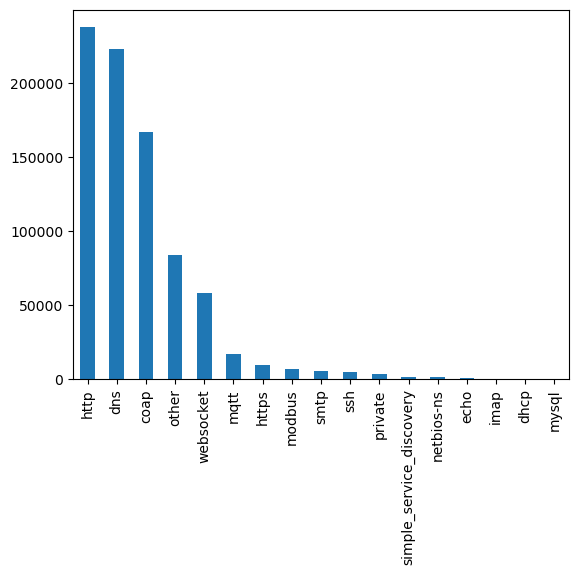

In [37]:
bar_graph('Service')

In [65]:
mydata.Timestamp.value_counts()

1578542789      4387
1578542119      4345
1578540712      4337
1578541391      3669
1578540712.0    1292
                ... 
1579828955         1
1580692930         1
1579644303         1
1579734116         1
1579222902.0       1
Name: Timestamp, Length: 273175, dtype: int64

In [66]:
mydata

,Date,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Protocol,Service,Duration,Scr_bytes,...,Avg_system_time,Avg_iowait_time,Avg_rtps,Avg_wtps,OSSEC_alert,OSSEC_alert_level,Login_attempt,Succesful_login,is_privileged,class3
0,9/01/2020,1578540956,192.168.2.199,49278,192.168.2.10,80,tcp,http,0.67369,13437,...,4.864,0.311,8,4.297,1,5,0,0,0,Attack
1,13/01/2020,1578871873,10.0.1.5,39769,131.236.3.92,53,udp,dns,0.000083,78,...,3.778,2.741,0,6.6,0,0,0,0,0,Normal
2,9/01/2020,1578522486,172.24.1.80,59050,172.24.1.1,53,udp,dns,0.000132,38,...,1.693,2.423,30.1,7.3,0,0,0,0,0,Normal
3,27/02/2020,1582757640,192.168.2.196,37966,192.168.2.10,1880,tcp,websocket,9.378481,1121,...,3.941,0.509,23.3,5.7,0,0,1,1,1,Normal
4,16/12/2019,1576452612,172.24.1.80,38233,172.24.1.1,53,udp,dns,0.000074,-,...,2.415,1.803,0.1,9.7,0,0,0,0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820829,7/01/2020,1578374008.0,192.168.2.199,50886,192.168.2.10,22,tcp,ssh,-,-,...,1.563,1.506,6.3,11.7,0,0,0,0,0,Attack
820830,22/01/2020,1579653575.0,172.24.1.80,45913,172.24.1.1,1880,tcp,websocket,63.290477,0,...,2.823,3.323,13,8.4,0,0,0,0,0,Normal
820831,15/01/2020,1579064398.0,192.168.10.153,53252,192.168.2.10,80,tcp,http,14.787547,26091,...,1.865,0.1,0.1,3.1,0,0,0,0,0,Normal
820832,7/01/2020,1578374864.0,192.168.2.199,44451,192.168.2.10,19315,tcp,other,0.000011,0,...,2.074,0.829,1.5,11.6,0,0,0,0,0,Attack


C:\Users\framatome\AppData\Local\Temp\ipykernel_7268\615473051.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = mydata.corr()


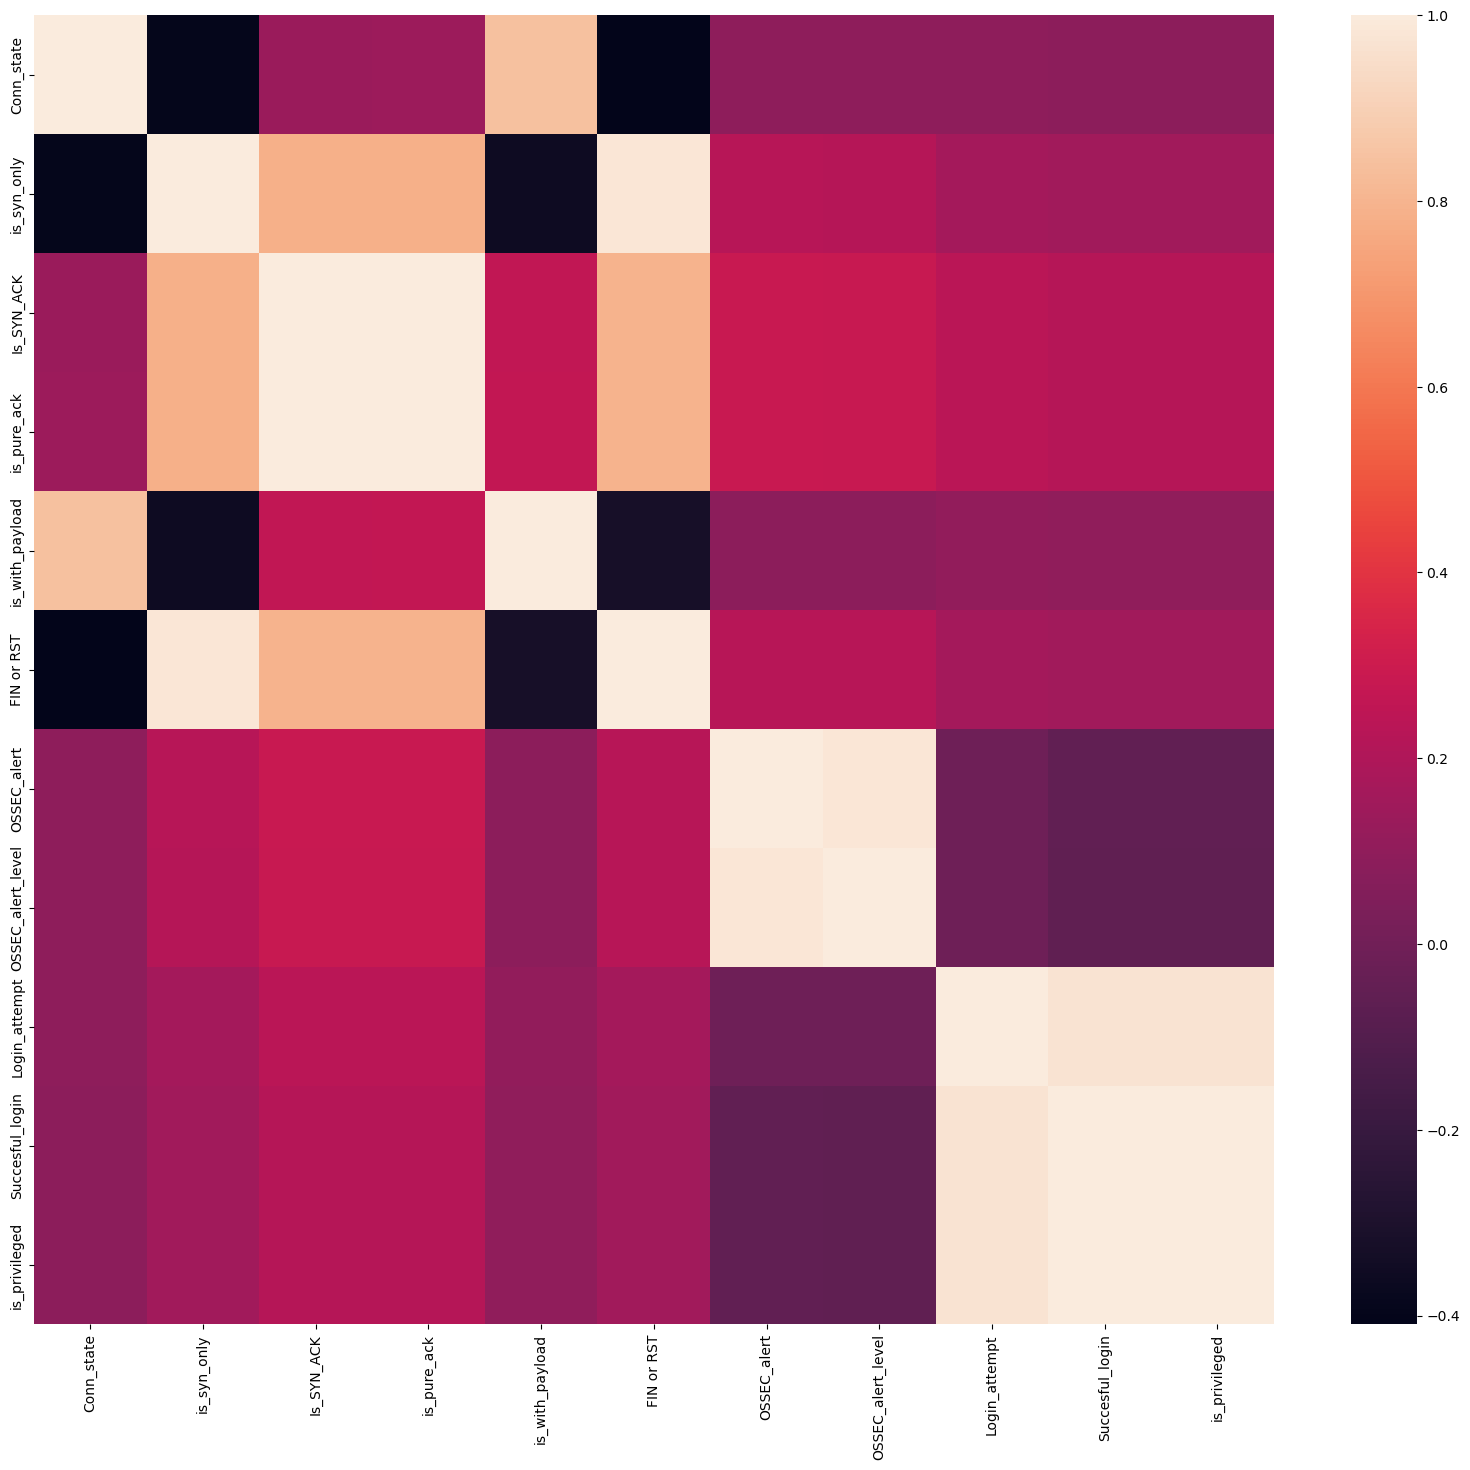

In [9]:
mydata = mydata[[col for col in mydata.columns if mydata[col].nunique()>1]]
corr = mydata.corr()

plt.figure(figsize=(20,17))
sns.heatmap(corr)

plt.show()

In [67]:
#Check the correlation of some features of the dataset

mydata['Is_SYN_ACK'].corr(mydata['is_pure_ack'])

0.9962821010284942

In [70]:
mydata['FIN or RST'].corr(mydata['is_syn_only'])

0.9822578311195628

In [73]:
mydata['OSSEC_alert'].corr(mydata['OSSEC_alert_level'])

0.9784450674841646

In [76]:
mydata['Login_attempt'].corr(mydata['is_privileged'])

0.9692475849420203

In [77]:
mydata['Login_attempt'].corr(mydata['Succesful_login'])

0.9710180638933039

In [10]:
#Drop highly correlated features


mydata.drop('is_pure_ack', axis = 1, inplace=True)
mydata.drop('FIN or RST', axis = 1, inplace=True)
mydata.drop('is_privileged', axis = 1, inplace=True)
mydata.drop('Succesful_login', axis = 1, inplace=True)

In [33]:
mydata.drop(columns = ['class3', 'Avg_wtps', 'Avg_rtps', 'Avg_iowait_time', 'Avg_system_time', 'Avg_user_time'], inplace=True)

In [34]:
mydata.dtypes

Timestamp            int32
Scr_IP              object
Scr_port            object
Des_IP              object
Des_port            object
Protocol            object
Service             object
Duration            object
Scr_bytes           object
Des_bytes           object
Conn_state           int64
missed_bytes        object
is_syn_only          int64
Is_SYN_ACK           int64
is_with_payload      int64
Scr_pkts            object
Scr_ip_bytes        object
Des_pkts            object
Des_ip_bytes        object
anomaly_alert       object
total_bytes         object
total_packet        object
paket_rate          object
byte_rate           object
Scr_packts_ratio    object
Des_pkts_ratio      object
Scr_bytes_ratio     object
Des_bytes_ratio     object
OSSEC_alert          int64
Login_attempt        int64
dtype: object

In [12]:
#Replace any empty string and some '?' dates by most frequent date
mydata['Date'].fillna( mydata.Date.mode()[0], inplace = True)
mydata['Date'] = mydata['Date'].replace('', mydata.Date.mode()[0])
mydata['Date'] = mydata['Date'].replace('?', mydata.Date.mode()[0])

In [13]:
mydata['Date'] = pd.to_datetime(mydata['Date'], format = "%d/%m/%y", infer_datetime_format=True) #Parse the string dates into Date.

C:\Users\framatome\AppData\Local\Temp\ipykernel_7268\3745301263.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  mydata['Date'] = pd.to_datetime(mydata['Date'], format = "%d/%m/%y", infer_datetime_format=True) #Parse the string dates into Date.


In [17]:
mydata.Timestamp.isnull().sum() #Check number of empty Timestamp cells #297

0

In [15]:
mydata.Date.isnull().sum()

0

In [16]:
#Replace each of the empty cells of Timestamp with the converted timestamp from the Date feature
mydata['Date'] = pd.to_datetime(mydata['Date'])
mydata['Timestamp'] = mydata['Timestamp'].fillna(mydata['Date'].apply(datetime.timestamp))


In [18]:
mydata.drop('Date', axis = 1, inplace= True)

In [55]:
mydata.loc[mydata.Timestamp=='?'] #154 rows with missing timestamp, and several other features to be dropped


for idx, val in mydata.loc[mydata.Timestamp =='?'].Timestamp.items():
    mydata = mydata.drop(idx, axis=0)

In [23]:
mydata['Timestamp'] = mydata['Timestamp'].astype(int)

In [36]:
mydata.dtypes

Timestamp            int32
Scr_IP              object
Scr_port            object
Des_IP              object
Des_port            object
Protocol            object
Service             object
Duration            object
Scr_bytes           object
Des_bytes           object
Conn_state           int64
missed_bytes        object
is_syn_only          int64
Is_SYN_ACK           int64
is_with_payload      int64
Scr_pkts            object
Scr_ip_bytes        object
Des_pkts            object
Des_ip_bytes        object
anomaly_alert       object
total_bytes         object
total_packet        object
paket_rate          object
byte_rate           object
Scr_packts_ratio    object
Des_pkts_ratio      object
Scr_bytes_ratio     object
Des_bytes_ratio     object
OSSEC_alert          int64
Login_attempt        int64
dtype: object

In [35]:
mydata

,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Protocol,Service,Duration,Scr_bytes,Des_bytes,...,total_bytes,total_packet,paket_rate,byte_rate,Scr_packts_ratio,Des_pkts_ratio,Scr_bytes_ratio,Des_bytes_ratio,OSSEC_alert,Login_attempt
0,1578540956,192.168.2.199,49278,192.168.2.10,80,tcp,http,0.67369,13437,34924,...,107658,210,311.7160712,159803.4704,0.5,0.5,0.300414275,0.699585725,1,0
1,1578871873,10.0.1.5,39769,131.236.3.92,53,udp,dns,0.000083,78,0,...,212,2,24096.38554,2554216.867,1,0,1,0,0,0
2,1578522486,172.24.1.80,59050,172.24.1.1,53,udp,dns,0.000132,38,38,...,208,2,15151.51515,1575757.576,0.5,0.5,0.5,0.5,0,0
3,1582757640,192.168.2.196,37966,192.168.2.10,1880,tcp,websocket,9.378481,1121,484,...,3954,14,1.492779055,421.6034558,0.571428571,0.428571429,0.67425392,0.32574608,0,1
4,1576452612,172.24.1.80,38233,172.24.1.1,53,udp,dns,0.000074,-,-,...,-,-,-,-,-,-,-,-,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820829,1578374008,192.168.2.199,50886,192.168.2.10,22,tcp,ssh,-,-,-,...,-,1,-,-,1,0,-,-,0,0
820830,1579653575,172.24.1.80,45913,172.24.1.1,1880,tcp,websocket,63.290477,0,0,...,380,7,0.110601157,6.004062823,0.571428571,0.428571429,0.568421053,0.431578947,0,0
820831,1579064398,192.168.10.153,53252,192.168.2.10,80,tcp,http,14.787547,26091,604398,...,1292591,784,53.01758297,87410.77881,0.343112245,0.656887755,0.048713011,0.951286989,0,0
820832,1578374864,192.168.2.199,44451,192.168.2.10,19315,tcp,other,0.000011,0,0,...,84,2,181818.1818,7636363.636,0.5,0.5,0.523809524,0.476190476,0,0


In [41]:
mydata.Scr_IP.value_counts()

192.168.2.199                156023
172.24.1.80                  103358
172.24.1.244                  75353
192.168.2.10                  71598
192.168.10.153                68424
172.24.1.233                  65908
10.0.1.5                      63527
192.168.10.155                62880
127.0.0.1                     41633
172.24.1.33                   23135
172.24.1.34                   22476
192.168.2.196                 20387
172.24.1.213                  10541
172.24.1.199                   8101
172.24.1.100                   7360
10.0.1.1                       6291
192.168.2.15                   6093
172.24.1.1                     5541
172.24.1.101                   1380
fe80::cd0a:9bbc:bd36:d371       248
fe80::186a:2874:7a4d:636        191
fe80::9dbf:575b:8abf:902        102
192.168.10.150                   49
fe80::1c1e:ef6b:4490:a231        46
192.168.1.196                    10
0.0.0.0                           9
255.255.255.255                   3
169.254.211.113             

In [42]:
pmap = {'192.168.1.196':1, 'fe80::1c1e:ef6b:4490:a231':2, '192.168.10.150': 3, 'fe80::9dbf:575b:8abf:902': 4, 'fe80::186a:2874:7a4d:636': 5, 'fe80::cd0a:9bbc:bd36:d371': 6, '172.24.1.101':7, '172.24.1.1': 8, '192.168.2.15': 9, '10.0.1.1': 10, '172.24.1.100': 11, '172.24.1.199': 12, '172.24.1.213': 13, '192.168.2.196': 14, '172.24.1.34': 15, '172.24.1.33': 16, '127.0.0.1': 17, '192.168.10.155': 18, '10.0.1.5': 19, '172.24.1.233': 20, '192.168.10.153': 21, '192.168.2.10': 22, '172.24.1.244': 23, '172.24.1.80':24, '192.168.2.199':25}

mydata['Scr_IP'] = mydata['Scr_IP'].map(pmap)

In [45]:
mydata.Des_IP.value_counts().head(25)

192.168.2.10       312684
172.24.1.1         296263
192.168.2.199       42428
127.0.0.1           41633
131.236.3.92        31795
129.94.0.197        31732
192.168.10.150      28851
224.0.0.252          8720
10.0.1.5             6567
172.24.1.199         5361
224.0.0.251          2782
239.255.255.250      2641
172.24.1.255         1937
157.240.8.18         1140
161.69.36.37          961
157.240.8.52          768
192.168.10.255        559
172.24.1.100          482
192.168.2.255         469
157.240.8.13          409
216.58.199.66         240
ff02::1:3             228
172.217.25.36         142
17.57.145.36          107
ff02::fb              105
Name: Des_IP, dtype: int64

In [46]:
mydata['Des_IP'] = mydata['Des_IP'].map(pmap)

In [48]:
mydata.Des_IP.value_counts()

22.0    312684
8.0     296263
25.0     42428
17.0     41633
3.0      28851
19.0      6567
12.0      5361
11.0       482
4.0         47
14.0        23
24.0         6
9.0          3
7.0          2
13.0         1
Name: Des_IP, dtype: int64

In [49]:
mydata

,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Protocol,Service,Duration,Scr_bytes,Des_bytes,...,total_bytes,total_packet,paket_rate,byte_rate,Scr_packts_ratio,Des_pkts_ratio,Scr_bytes_ratio,Des_bytes_ratio,OSSEC_alert,Login_attempt
0,1578540956,25.0,49278,22.0,80,tcp,http,0.67369,13437,34924,...,107658,210,311.7160712,159803.4704,0.5,0.5,0.300414275,0.699585725,1,0
1,1578871873,19.0,39769,NaN,53,udp,dns,0.000083,78,0,...,212,2,24096.38554,2554216.867,1,0,1,0,0,0
2,1578522486,24.0,59050,8.0,53,udp,dns,0.000132,38,38,...,208,2,15151.51515,1575757.576,0.5,0.5,0.5,0.5,0,0
3,1582757640,14.0,37966,22.0,1880,tcp,websocket,9.378481,1121,484,...,3954,14,1.492779055,421.6034558,0.571428571,0.428571429,0.67425392,0.32574608,0,1
4,1576452612,24.0,38233,8.0,53,udp,dns,0.000074,-,-,...,-,-,-,-,-,-,-,-,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820829,1578374008,25.0,50886,22.0,22,tcp,ssh,-,-,-,...,-,1,-,-,1,0,-,-,0,0
820830,1579653575,24.0,45913,8.0,1880,tcp,websocket,63.290477,0,0,...,380,7,0.110601157,6.004062823,0.571428571,0.428571429,0.568421053,0.431578947,0,0
820831,1579064398,21.0,53252,22.0,80,tcp,http,14.787547,26091,604398,...,1292591,784,53.01758297,87410.77881,0.343112245,0.656887755,0.048713011,0.951286989,0,0
820832,1578374864,25.0,44451,22.0,19315,tcp,other,0.000011,0,0,...,84,2,181818.1818,7636363.636,0.5,0.5,0.523809524,0.476190476,0,0


In [50]:
mydata2 = mydata.copy()

In [56]:
mydata3 = mydata2.copy()

In [58]:
mydata2['Des_IP'] = mydata['Des_IP']

In [59]:
mydata2

,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Protocol,Service,Duration,Scr_bytes,Des_bytes,...,total_bytes,total_packet,paket_rate,byte_rate,Scr_packts_ratio,Des_pkts_ratio,Scr_bytes_ratio,Des_bytes_ratio,OSSEC_alert,Login_attempt
0,1578540956,192.168.2.199,49278,192.168.2.10,80,tcp,http,0.67369,13437,34924,...,107658,210,311.7160712,159803.4704,0.5,0.5,0.300414275,0.699585725,1,0
1,1578871873,10.0.1.5,39769,131.236.3.92,53,udp,dns,0.000083,78,0,...,212,2,24096.38554,2554216.867,1,0,1,0,0,0
2,1578522486,172.24.1.80,59050,172.24.1.1,53,udp,dns,0.000132,38,38,...,208,2,15151.51515,1575757.576,0.5,0.5,0.5,0.5,0,0
3,1582757640,192.168.2.196,37966,192.168.2.10,1880,tcp,websocket,9.378481,1121,484,...,3954,14,1.492779055,421.6034558,0.571428571,0.428571429,0.67425392,0.32574608,0,1
4,1576452612,172.24.1.80,38233,172.24.1.1,53,udp,dns,0.000074,-,-,...,-,-,-,-,-,-,-,-,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820829,1578374008,192.168.2.199,50886,192.168.2.10,22,tcp,ssh,-,-,-,...,-,1,-,-,1,0,-,-,0,0
820830,1579653575,172.24.1.80,45913,172.24.1.1,1880,tcp,websocket,63.290477,0,0,...,380,7,0.110601157,6.004062823,0.571428571,0.428571429,0.568421053,0.431578947,0,0
820831,1579064398,192.168.10.153,53252,192.168.2.10,80,tcp,http,14.787547,26091,604398,...,1292591,784,53.01758297,87410.77881,0.343112245,0.656887755,0.048713011,0.951286989,0,0
820832,1578374864,192.168.2.199,44451,192.168.2.10,19315,tcp,other,0.000011,0,0,...,84,2,181818.1818,7636363.636,0.5,0.5,0.523809524,0.476190476,0,0


In [60]:
mydata = mydata2.copy()

In [61]:
mydata.Protocol.value_counts()

tcp     422334
udp     395620
icmp      2726
Name: Protocol, dtype: int64

In [64]:
pmap = {'icmp': 1, 'udp':2, 'tcp':3}

mydata['Protocol'] = mydata['Protocol'].map(pmap)

In [68]:
mydata.Protocol.value_counts()

3    422334
2    395620
1      2726
Name: Protocol, dtype: int64

In [66]:
mydata.drop('Protocl', axis=1, inplace=True)

In [67]:
mydata.Service.value_counts()

http                        237738
dns                         222713
coap                        167236
other                        83545
websocket                    58462
mqtt                         17121
https                         9517
modbus                        6525
smtp                          5322
ssh                           5040
private                       3607
simple_service_discovery      1645
netbios-ns                    1256
echo                           642
imap                           165
dhcp                            91
mysql                           55
Name: Service, dtype: int64

In [70]:
pmap = {'mysql': 1, 'dhcp':2, 'imap':3, 'echo':4, 'netbios-ns':5, 'simple_service_discovery':6, 'private':7, 'ssh':8, 'smtp':9, 'modbus':10, 'https':11, 'mqtt':12, 'websocket ':13, 'other':14, 'coap':15, 'dns':16, 'http':17}

mydata['Service'] = mydata['Service'].map(pmap)

In [74]:
mydata.Service.value_counts()

17.0    237738
16.0    222713
15.0    167236
14.0     83545
13.0     58462
12.0     17121
11.0      9517
10.0      6525
9.0       5322
8.0       5040
7.0       3607
6.0       1645
5.0       1256
4.0        642
3.0        165
2.0         91
1.0         55
Name: Service, dtype: int64

In [73]:
mydata['Service'].fillna(13.0, inplace = True)

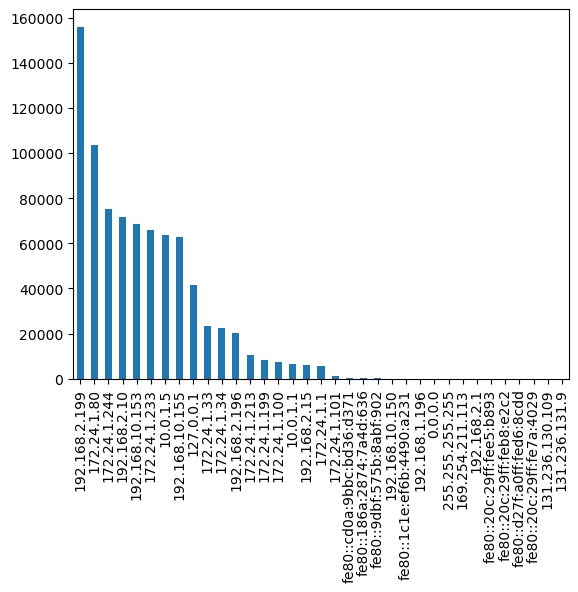

In [76]:
bar_graph('Scr_IP')

In [78]:
mydata.Des_IP.value_counts().head(25)

192.168.2.10       312684
172.24.1.1         296263
192.168.2.199       42428
127.0.0.1           41633
131.236.3.92        31795
129.94.0.197        31732
192.168.10.150      28851
224.0.0.252          8720
10.0.1.5             6567
172.24.1.199         5361
224.0.0.251          2782
239.255.255.250      2641
172.24.1.255         1937
157.240.8.18         1140
161.69.36.37          961
157.240.8.52          768
192.168.10.255        559
172.24.1.100          482
192.168.2.255         469
157.240.8.13          409
216.58.199.66         240
ff02::1:3             228
172.217.25.36         142
17.57.145.36          107
ff02::fb              105
Name: Des_IP, dtype: int64

In [79]:
mydata.dtypes

Timestamp             int32
Scr_IP               object
Scr_port             object
Des_IP               object
Des_port             object
Protocol              int64
Service             float64
Duration             object
Scr_bytes            object
Des_bytes            object
Conn_state            int64
missed_bytes         object
is_syn_only           int64
Is_SYN_ACK            int64
is_with_payload       int64
Scr_pkts             object
Scr_ip_bytes         object
Des_pkts             object
Des_ip_bytes         object
anomaly_alert        object
total_bytes          object
total_packet         object
paket_rate           object
byte_rate            object
Scr_packts_ratio     object
Des_pkts_ratio       object
Scr_bytes_ratio      object
Des_bytes_ratio      object
OSSEC_alert           int64
Login_attempt         int64
dtype: object

In [80]:
mydata.Duration.value_counts()

-            75607
0.000006      8056
0.000011      6613
0.000007      6010
0.000005      5769
             ...  
15.092621        1
4.610577         1
0.032506         1
0.68486          1
14.787547        1
Name: Duration, Length: 330207, dtype: int64

In [84]:
mydata.loc[mydata.Scr_bytes == '-', ['Scr_bytes', 'Des_bytes', 'is_syn_only', 'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts', 'Des_ip_bytes', 'total_bytes','total_packet']]

,Scr_bytes,Des_bytes,is_syn_only,Scr_pkts,Scr_ip_bytes,Des_pkts,Des_ip_bytes,total_bytes,total_packet
4,-,-,0,-,-,-,-,-,-
11,-,-,1,-,-,-,-,-,-
17,-,-,0,-,-,-,-,-,-
20,-,-,1,-,-,-,-,-,-
21,-,-,1,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...
820799,-,-,1,-,-,-,-,-,-
820804,-,-,0,1,590,0,0,-,1
820818,-,-,1,-,-,-,-,-,-
820828,-,-,1,-,-,-,-,-,-


In [93]:
mydata.to_csv('processed_data.csv', index=False)

In [ ]:
for idx, val in mydata.loc[mydata.Scr_bytes =='-'].Scr_bytes.items():
    mydata = mydata.drop(idx, axis=0)

In [86]:
mydata.loc[mydata.Scr_bytes == '-', ['Scr_bytes', 'Des_bytes', 'is_syn_only', 'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts', 'Des_ip_bytes', 'total_bytes','total_packet']]

,Scr_bytes,Des_bytes,is_syn_only,Scr_pkts,Scr_ip_bytes,Des_pkts,Des_ip_bytes,total_bytes,total_packet
8051,-,-,0,1,590,0,0,-,1
8054,-,-,0,1,590,0,0,-,1
8055,-,-,1,-,-,-,-,-,-
8056,-,-,0,1,590,0,0,-,1
8058,-,-,1,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...
820799,-,-,1,-,-,-,-,-,-
820804,-,-,0,1,590,0,0,-,1
820818,-,-,1,-,-,-,-,-,-
820828,-,-,1,-,-,-,-,-,-


In [87]:
delete = '-'

mydata = mydata[mydata['Scr_bytes'] != delete]

In [88]:
mydata.loc[mydata.Scr_bytes == '-', ['Scr_bytes', 'Des_bytes', 'is_syn_only', 'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts', 'Des_ip_bytes', 'total_bytes','total_packet']]

,Scr_bytes,Des_bytes,is_syn_only,Scr_pkts,Scr_ip_bytes,Des_pkts,Des_ip_bytes,total_bytes,total_packet


In [89]:
mydata.head()

,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Protocol,Service,Duration,Scr_bytes,Des_bytes,...,total_bytes,total_packet,paket_rate,byte_rate,Scr_packts_ratio,Des_pkts_ratio,Scr_bytes_ratio,Des_bytes_ratio,OSSEC_alert,Login_attempt
0,1578540956,192.168.2.199,49278,192.168.2.10,80,3,17.0,0.67369,13437,34924,...,107658,210,311.7160712,159803.4704,0.5,0.5,0.300414275,0.699585725,1,0
1,1578871873,10.0.1.5,39769,131.236.3.92,53,2,16.0,0.000083,78,0,...,212,2,24096.38554,2554216.867,1,0,1,0,0,0
2,1578522486,172.24.1.80,59050,172.24.1.1,53,2,16.0,0.000132,38,38,...,208,2,15151.51515,1575757.576,0.5,0.5,0.5,0.5,0,0
3,1582757640,192.168.2.196,37966,192.168.2.10,1880,3,13.0,9.378481,1121,484,...,3954,14,1.492779055,421.6034558,0.571428571,0.428571429,0.67425392,0.32574608,0,1
5,1580452611,192.168.10.155,50502,192.168.2.10,80,3,17.0,5.153928,460,671,...,4569,22,4.268588929,886.5083098,0.545454545,0.454545455,0.442109871,0.557890129,0,0


In [90]:
mydata.drop(columns = ['anomaly_alert', 'OSSEC_alert'], inplace = True)

C:\Users\framatome\AppData\Local\Temp\ipykernel_7268\3325038725.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mydata.drop(columns = ['anomaly_alert', 'OSSEC_alert'], inplace = True)


In [92]:
mydata.dtypes

Timestamp             int32
Scr_IP               object
Scr_port             object
Des_IP               object
Des_port             object
Protocol              int64
Service             float64
Duration             object
Scr_bytes            object
Des_bytes            object
Conn_state            int64
missed_bytes         object
is_syn_only           int64
Is_SYN_ACK            int64
is_with_payload       int64
Scr_pkts             object
Scr_ip_bytes         object
Des_pkts             object
Des_ip_bytes         object
total_bytes          object
total_packet         object
paket_rate           object
byte_rate            object
Scr_packts_ratio     object
Des_pkts_ratio       object
Scr_bytes_ratio      object
Des_bytes_ratio      object
Login_attempt         int64
dtype: object

In [94]:
mydata.Duration.value_counts()

0.000006     6539
0.000007     4875
0.000011     4733
0.000005     4646
0.000008     4047
             ... 
0.63789         1
8.746916        1
5.057159        1
3.152764        1
14.787547       1
Name: Duration, Length: 286981, dtype: int64

In [100]:
is_numeric = pd.to_numeric(mydata['Scr_bytes'], errors='coerce').notnull().all()


print("Column contains only number: ", is_numeric)

Column contains only number:  True


In [102]:
is_numeric = pd.to_numeric(mydata['Des_bytes'], errors='coerce').notnull().all()


print("Column contains only number: ", is_numeric)

Column contains only number:  True


In [103]:
is_numeric = pd.to_numeric(mydata['missed_bytes'], errors='coerce').notnull().all()


print("Column contains only number: ", is_numeric)

Column contains only number:  True


In [104]:
is_numeric = pd.to_numeric(mydata['Scr_pkts'], errors='coerce').notnull().all()


print("Column contains only number: ", is_numeric)

Column contains only number:  True


In [101]:
mydata['Scr_bytes'] = mydata['Scr_bytes'].astype(float)

In [105]:
is_numeric = pd.to_numeric(mydata['Scr_ip_bytes'], errors='coerce').notnull().all()


print("Column contains only number: ", is_numeric)

Column contains only number:  False


In [108]:
mydata.Scr_ip_bytes.value_counts()

65       52818
44       40079
1180     35318
60       27379
268      23924
         ...  
21386        1
87678        1
47321        1
57943        1
36875        1
Name: Scr_ip_bytes, Length: 32854, dtype: int64

In [106]:
mydata['Des_bytes'] = mydata['Des_bytes'].astype(float)
mydata['missed_bytes'] = mydata['missed_bytes'].astype(float)
mydata['Scr_pkts'] = mydata['Scr_pkts'].astype(float)

In [107]:
mydata.dtypes

Timestamp             int32
Scr_IP               object
Scr_port             object
Des_IP               object
Des_port             object
Protocol              int64
Service             float64
Duration            float64
Scr_bytes           float64
Des_bytes           float64
Conn_state            int64
missed_bytes        float64
is_syn_only           int64
Is_SYN_ACK            int64
is_with_payload       int64
Scr_pkts            float64
Scr_ip_bytes         object
Des_pkts             object
Des_ip_bytes         object
total_bytes          object
total_packet         object
paket_rate           object
byte_rate            object
Scr_packts_ratio     object
Des_pkts_ratio       object
Scr_bytes_ratio      object
Des_bytes_ratio      object
Login_attempt         int64
dtype: object

In [109]:
is_numeric = pd.to_numeric(mydata['Des_pkts'], errors='coerce').notnull().all()


print("Column contains only number: ", is_numeric)

Column contains only number:  True


In [110]:
is_numeric = pd.to_numeric(mydata['Des_ip_bytes'], errors='coerce').notnull().all()


print("Column contains only number: ", is_numeric)

Column contains only number:  True


In [111]:
is_numeric = pd.to_numeric(mydata['total_bytes'], errors='coerce').notnull().all()


print("Column contains only number: ", is_numeric)

Column contains only number:  False


In [112]:
is_numeric = pd.to_numeric(mydata['total_packet'], errors='coerce').notnull().all()


print("Column contains only number: ", is_numeric)

Column contains only number:  True


In [113]:
is_numeric = pd.to_numeric(mydata['paket_rate'], errors='coerce').notnull().all()


print("Column contains only number: ", is_numeric)

Column contains only number:  True


In [114]:
is_numeric = pd.to_numeric(mydata['byte_rate'], errors='coerce').notnull().all()


print("Column contains only number: ", is_numeric)

Column contains only number:  False


In [115]:
is_numeric = pd.to_numeric(mydata['Scr_packts_ratio'], errors='coerce').notnull().all()


print("Column contains only number: ", is_numeric)

Column contains only number:  True


In [116]:
is_numeric = pd.to_numeric(mydata['Des_pkts_ratio'], errors='coerce').notnull().all()


print("Column contains only number: ", is_numeric)

Column contains only number:  True


In [117]:
is_numeric = pd.to_numeric(mydata['Scr_bytes_ratio'], errors='coerce').notnull().all()


print("Column contains only number: ", is_numeric)

Column contains only number:  False


In [118]:
is_numeric = pd.to_numeric(mydata['Des_bytes_ratio'], errors='coerce').notnull().all()


print("Column contains only number: ", is_numeric)

Column contains only number:  False


In [120]:
mydata['Des_pkts'] = mydata['Des_pkts'].astype(float)
mydata['Des_ip_bytes'] = mydata['Des_ip_bytes'].astype(float)
mydata['total_packet'] = mydata['total_packet'].astype(float)
mydata['paket_rate'] = mydata['paket_rate'].astype(float)
mydata['Scr_packts_ratio'] = mydata['Scr_packts_ratio'].astype(float)
mydata['Des_pkts_ratio'] = mydata['Des_pkts_ratio'].astype(float)

In [121]:
mydata.dtypes

Timestamp             int32
Scr_IP               object
Scr_port             object
Des_IP               object
Des_port             object
Protocol              int64
Service             float64
Duration            float64
Scr_bytes           float64
Des_bytes           float64
Conn_state            int64
missed_bytes        float64
is_syn_only           int64
Is_SYN_ACK            int64
is_with_payload       int64
Scr_pkts            float64
Scr_ip_bytes         object
Des_pkts            float64
Des_ip_bytes        float64
total_bytes          object
total_packet        float64
paket_rate          float64
byte_rate            object
Scr_packts_ratio    float64
Des_pkts_ratio      float64
Scr_bytes_ratio      object
Des_bytes_ratio      object
Login_attempt         int64
dtype: object

In [95]:
mydata.to_csv('scaled_data_07_07.csv', index=False)

In [2]:
mydata = pd.read_csv('processed_data.csv')

C:\Users\framatome\AppData\Local\Temp\ipykernel_21008\1163818012.py:1: DtypeWarning: Columns (16,19,22,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  mydata = pd.read_csv('processed_data.csv')


In [3]:
mydata

,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Protocol,Service,Duration,Scr_bytes,Des_bytes,...,Des_ip_bytes,total_bytes,total_packet,paket_rate,byte_rate,Scr_packts_ratio,Des_pkts_ratio,Scr_bytes_ratio,Des_bytes_ratio,Login_attempt
0,1578540956,192.168.2.199,49278,192.168.2.10,80,3,17.0,0.673690,13437.0,34924.0,...,40392.0,107658,210.0,311.716071,159803.4704,0.500000,0.500000,0.300414,0.699586,0
1,1578871873,10.0.1.5,39769,131.236.3.92,53,2,16.0,0.000083,78.0,0.0,...,0.0,212,2.0,24096.385540,2554216.867,1.000000,0.000000,1.0,0.0,0
2,1578522486,172.24.1.80,59050,172.24.1.1,53,2,16.0,0.000132,38.0,38.0,...,66.0,208,2.0,15151.515150,1575757.576,0.500000,0.500000,0.5,0.5,0
3,1582757640,192.168.2.196,37966,192.168.2.10,1880,3,13.0,9.378481,1121.0,484.0,...,804.0,3954,14.0,1.492779,421.603456,0.571429,0.428571,0.674254,0.325746,1
4,1580452611,192.168.10.155,50502,192.168.2.10,80,3,17.0,5.153928,460.0,671.0,...,1878.0,4569,22.0,4.268589,886.50831,0.545455,0.454545,0.44211,0.55789,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596958,1579041266,192.168.2.199,51292,192.168.2.10,80,3,17.0,0.205832,127.0,310.0,...,578.0,1462,11.0,53.441642,7102.880019,0.545455,0.454545,0.392613,0.607387,0
596959,1579653575,172.24.1.80,45913,172.24.1.1,1880,3,13.0,63.290477,0.0,0.0,...,164.0,380,7.0,0.110601,6.004063,0.571429,0.428571,0.568421,0.431579,0
596960,1579064398,192.168.10.153,53252,192.168.2.10,80,3,17.0,14.787547,26091.0,604398.0,...,625227.0,1292591,784.0,53.017583,87410.77881,0.343112,0.656888,0.048713,0.951287,0
596961,1578374864,192.168.2.199,44451,192.168.2.10,19315,3,14.0,0.000011,0.0,0.0,...,40.0,84,2.0,181818.181800,7636363.636,0.500000,0.500000,0.52381,0.47619,0


In [21]:
#Create a series of unique elements, ordered by frequency. This will be used as keys for the mapping
S = pd.Series(mydata.Scr_IP.value_counts().index)

S

0                 192.168.2.199
1                   172.24.1.80
2                192.168.10.153
3                  192.168.2.10
4                      10.0.1.5
5                192.168.10.155
6                  172.24.1.244
7                  172.24.1.233
8                     127.0.0.1
9                   172.24.1.33
10                  172.24.1.34
11                192.168.2.196
12                 172.24.1.213
13                 172.24.1.199
14                 172.24.1.100
15                     10.0.1.1
16                 192.168.2.15
17                   172.24.1.1
18                 172.24.1.101
19     fe80::186a:2874:7a4d:636
20    fe80::cd0a:9bbc:bd36:d371
21     fe80::9dbf:575b:8abf:902
22    fe80::1c1e:ef6b:4490:a231
23              255.255.255.255
24                      0.0.0.0
25                  192.168.2.1
26              169.254.211.113
dtype: object

In [26]:
len(S)

27

In [22]:
list(S)

['192.168.2.199',
 '172.24.1.80',
 '192.168.10.153',
 '192.168.2.10',
 '10.0.1.5',
 '192.168.10.155',
 '172.24.1.244',
 '172.24.1.233',
 '127.0.0.1',
 '172.24.1.33',
 '172.24.1.34',
 '192.168.2.196',
 '172.24.1.213',
 '172.24.1.199',
 '172.24.1.100',
 '10.0.1.1',
 '192.168.2.15',
 '172.24.1.1',
 '172.24.1.101',
 'fe80::186a:2874:7a4d:636',
 'fe80::cd0a:9bbc:bd36:d371',
 'fe80::9dbf:575b:8abf:902',
 'fe80::1c1e:ef6b:4490:a231',
 '255.255.255.255',
 '0.0.0.0',
 '192.168.2.1',
 '169.254.211.113']

In [23]:
keys = list(S)
values = range(27, 0, -1)


dictionary = {k: v for k, v in zip(keys, values)}

# Display the dictionary
print(dictionary)

{'192.168.2.199': 27, '172.24.1.80': 26, '192.168.10.153': 25, '192.168.2.10': 24, '10.0.1.5': 23, '192.168.10.155': 22, '172.24.1.244': 21, '172.24.1.233': 20, '127.0.0.1': 19, '172.24.1.33': 18, '172.24.1.34': 17, '192.168.2.196': 16, '172.24.1.213': 15, '172.24.1.199': 14, '172.24.1.100': 13, '10.0.1.1': 12, '192.168.2.15': 11, '172.24.1.1': 10, '172.24.1.101': 9, 'fe80::186a:2874:7a4d:636': 8, 'fe80::cd0a:9bbc:bd36:d371': 7, 'fe80::9dbf:575b:8abf:902': 6, 'fe80::1c1e:ef6b:4490:a231': 5, '255.255.255.255': 4, '0.0.0.0': 3, '192.168.2.1': 2, '169.254.211.113': 1}


In [24]:
mydata['Scr_IP'] = mydata['Scr_IP'].map(dictionary)

In [25]:
mydata.Scr_IP.value_counts()

27    102789
26     83707
25     55484
24     53941
23     51639
22     51360
21     40967
20     36100
19     33862
18     20104
17     16512
16     16499
15      7025
14      6288
13      5245
12      5077
11      4705
10      4158
9       1111
8        157
7        148
6         63
5         15
4          3
3          2
2          1
1          1
Name: Scr_IP, dtype: int64

In [28]:
def frequency_encode(df, variable):
    S = pd.Series(df[variable].value_counts().index)
    
    keys = list(S)
    values = range(len(S), 0, -1)
    dictionary = {k: v for k, v in zip(keys, values)}
    
    df[variable] = df[variable].map(dictionary)


In [29]:
data = mydata.copy()

In [30]:
frequency_encode(data, 'Des_IP')

In [32]:
data.Des_IP.value_counts()

88    230514
87    204558
86     33862
85     31013
84     25836
       ...  
5          1
4          1
3          1
2          1
1          1
Name: Des_IP, Length: 88, dtype: int64

In [33]:
mydata.Des_IP.value_counts()

192.168.2.10      230514
172.24.1.1        204558
127.0.0.1          33862
192.168.2.199      31013
131.236.3.92       25836
                   ...  
52.206.150.125         1
157.240.8.19           1
216.58.200.98          1
157.240.9.48           1
8.8.8.8                1
Name: Des_IP, Length: 88, dtype: int64

In [34]:
frequency_encode(mydata, 'Des_IP')
frequency_encode(mydata, 'Scr_port')
frequency_encode(mydata, 'Des_port')

In [35]:
mydata.dtypes

Timestamp             int64
Scr_IP                int64
Scr_port              int64
Des_IP                int64
Des_port              int64
Protocol              int64
Service             float64
Duration            float64
Scr_bytes           float64
Des_bytes           float64
Conn_state            int64
missed_bytes        float64
is_syn_only           int64
Is_SYN_ACK            int64
is_with_payload       int64
Scr_pkts            float64
Scr_ip_bytes         object
Des_pkts            float64
Des_ip_bytes        float64
total_bytes          object
total_packet        float64
paket_rate          float64
byte_rate            object
Scr_packts_ratio    float64
Des_pkts_ratio      float64
Scr_bytes_ratio      object
Des_bytes_ratio      object
Login_attempt         int64
dtype: object

In [44]:
mydata.loc[mydata.Scr_ip_bytes == '-']

,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Protocol,Service,Duration,Scr_bytes,Des_bytes,...,Des_ip_bytes,total_bytes,total_packet,paket_rate,byte_rate,Scr_packts_ratio,Des_pkts_ratio,Scr_bytes_ratio,Des_bytes_ratio,Login_attempt


In [45]:
mydata.Scr_ip_bytes.value_counts()

65       49997
44       37855
1180     33443
60       25846
268      22659
         ...  
26486        1
33273        1
32544        1
9629         1
36875        1
Name: Scr_ip_bytes, Length: 36265, dtype: int64

In [46]:
column_name = 'Scr_ip_bytes'

non_numeric_values = mydata.loc[~pd.to_numeric(mydata[column_name], errors='coerce').notnull(), column_name]

In [47]:
non_numeric_values

514280    excel
Name: Scr_ip_bytes, dtype: object

In [50]:
mydata.loc[514280]

Timestamp            1579041213
Scr_IP                       26
Scr_port                   9041
Des_IP                       87
Des_port                   6301
Protocol                      2
Service                    16.0
Duration               0.000351
Scr_bytes                  37.0
Des_bytes                  37.0
Conn_state                    1
missed_bytes                0.0
is_syn_only                   0
Is_SYN_ACK                    0
is_with_payload               1
Scr_pkts                    1.0
Scr_ip_bytes              excel
Des_pkts                    1.0
Des_ip_bytes               65.0
total_bytes                   -
total_packet                2.0
paket_rate          5698.005698
byte_rate                     ?
Scr_packts_ratio            0.5
Des_pkts_ratio              0.5
Scr_bytes_ratio               -
Des_bytes_ratio               -
Login_attempt                 0
Name: 514280, dtype: object

In [51]:
mydata.drop(514280, axis = 0, inplace = True)

In [53]:
is_numeric = pd.to_numeric(mydata['Scr_ip_bytes'], errors='coerce').notnull().all()


print("Column contains only number: ", is_numeric)

Column contains only number:  True


In [54]:
is_numeric = pd.to_numeric(mydata['total_bytes'], errors='coerce').notnull().all()


print("Column contains only number: ", is_numeric)

Column contains only number:  True


In [55]:
is_numeric = pd.to_numeric(mydata['Scr_bytes_ratio'], errors='coerce').notnull().all()


print("Column contains only number: ", is_numeric)

Column contains only number:  True


In [56]:
is_numeric = pd.to_numeric(mydata['Des_bytes_ratio'], errors='coerce').notnull().all()


print("Column contains only number: ", is_numeric)

Column contains only number:  True


In [60]:
is_numeric = pd.to_numeric(mydata['byte_rate'], errors='coerce').notnull().all()


print("Column contains only number: ", is_numeric)

Column contains only number:  True


In [61]:
mydata['Scr_ip_bytes'] = mydata['Scr_ip_bytes'].astype(float)
mydata['total_bytes'] = mydata['total_bytes'].astype(float)
mydata['Scr_bytes_ratio'] = mydata['Scr_bytes_ratio'].astype(float)
mydata['Des_bytes_ratio'] = mydata['Des_bytes_ratio'].astype(float)
mydata['byte_rate'] = mydata['byte_rate'].astype(float)

In [62]:
mydata.dtypes

Timestamp             int64
Scr_IP                int64
Scr_port              int64
Des_IP                int64
Des_port              int64
Protocol              int64
Service             float64
Duration            float64
Scr_bytes           float64
Des_bytes           float64
Conn_state            int64
missed_bytes        float64
is_syn_only           int64
Is_SYN_ACK            int64
is_with_payload       int64
Scr_pkts            float64
Scr_ip_bytes        float64
Des_pkts            float64
Des_ip_bytes        float64
total_bytes         float64
total_packet        float64
paket_rate          float64
byte_rate           float64
Scr_packts_ratio    float64
Des_pkts_ratio      float64
Scr_bytes_ratio     float64
Des_bytes_ratio     float64
Login_attempt         int64
dtype: object

In [59]:
column_name = 'byte_rate'

non_numeric_values = mydata.loc[~pd.to_numeric(mydata[column_name], errors='coerce').notnull(), column_name]
non_numeric_values

Series([], Name: byte_rate, dtype: object)

In [63]:
mydata

,Timestamp,Scr_IP,Scr_port,Des_IP,Des_port,Protocol,Service,Duration,Scr_bytes,Des_bytes,...,Des_ip_bytes,total_bytes,total_packet,paket_rate,byte_rate,Scr_packts_ratio,Des_pkts_ratio,Scr_bytes_ratio,Des_bytes_ratio,Login_attempt
0,1578540956,27,53493,88,6302,3,17.0,0.673690,13437.0,34924.0,...,40392.0,107658.0,210.0,311.716071,1.598035e+05,0.500000,0.500000,0.300414,0.699586,0
1,1578871873,23,35791,84,6301,2,16.0,0.000083,78.0,0.0,...,0.0,212.0,2.0,24096.385540,2.554217e+06,1.000000,0.000000,1.000000,0.000000,0
2,1578522486,26,44663,87,6301,2,16.0,0.000132,38.0,38.0,...,66.0,208.0,2.0,15151.515150,1.575758e+06,0.500000,0.500000,0.500000,0.500000,0
3,1582757640,16,37043,88,6299,3,13.0,9.378481,1121.0,484.0,...,804.0,3954.0,14.0,1.492779,4.216035e+02,0.571429,0.428571,0.674254,0.325746,1
4,1580452611,22,53925,88,6302,3,17.0,5.153928,460.0,671.0,...,1878.0,4569.0,22.0,4.268589,8.865083e+02,0.545455,0.454545,0.442110,0.557890,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596958,1579041266,27,54623,88,6302,3,17.0,0.205832,127.0,310.0,...,578.0,1462.0,11.0,53.441642,7.102880e+03,0.545455,0.454545,0.392613,0.607387,0
596959,1579653575,26,39133,87,6299,3,13.0,63.290477,0.0,0.0,...,164.0,380.0,7.0,0.110601,6.004063e+00,0.571429,0.428571,0.568421,0.431579,0
596960,1579064398,25,52361,88,6302,3,17.0,14.787547,26091.0,604398.0,...,625227.0,1292591.0,784.0,53.017583,8.741078e+04,0.343112,0.656888,0.048713,0.951287,0
596961,1578374864,27,55056,88,6069,3,14.0,0.000011,0.0,0.0,...,40.0,84.0,2.0,181818.181800,7.636364e+06,0.500000,0.500000,0.523810,0.476190,0


In [67]:
scaler = MinMaxScaler()

data = scaler.fit_transform(mydata)

mydata = pd.DataFrame(data, columns = mydata.columns)

In [50]:
scaler = MinMaxScaler()

org_data = scaler.inverse_transform(mydata)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [84]:
classifier = KMeans(n_clusters = 6)

In [ ]:
y_predicted = classifier.fit_predict(mydata)

In [86]:
y_predicted

array([4, 3, 0, ..., 1, 2, 3])

In [74]:
print(classifier.inertia_)

235733.62458158867


In [ ]:
k_range = range(3,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(data)
    sse.append(km.inertia_)

In [ ]:
sse

In [ ]:
mydata.columns

In [ ]:
trial_data

In [ ]:
km = KMeans(n_clusters = 8)
y = km.fit_predict(trial_data)

In [ ]:
sse

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)

In [46]:
silhouette_coefficient = silhouette_score(trial_data, y)

# Display the Silhouette Coefficient
print(silhouette_coefficient)

0.5407759498777678


In [52]:
mydata = pd.read_csv('scaled_data_07_07.csv')
mydata.shape

In [56]:
trial_data = mydata.loc[1:400000,:]

In [57]:
k_range = range(3,15)
sse = []
for k in k_range:
    km = KMeans(n_clusters = k)
    km.fit(trial_data)
    sse.append(km.inertia_)

C:\Users\framatome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\framatome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\framatome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\framatome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\framatome\anaconda3\lib\site-pa

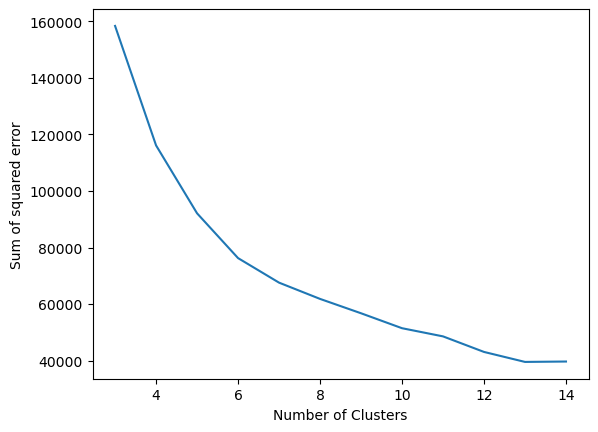

In [58]:
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared error')
plt.plot(k_range, sse)

In [59]:
km = KMeans(n_clusters = 7)
y = km.fit_predict(trial_data)
silhouette_coefficient = silhouette_score(trial_data, y)

# Display the Silhouette Coefficient
print(silhouette_coefficient)

C:\Users\framatome\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.5245529486099181


In [60]:
trial_data['Segment'] = y

C:\Users\framatome\AppData\Local\Temp\ipykernel_1248\1986953930.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trial_data['Segment'] = y


In [61]:
trial_data.columns

Index(['Timestamp', 'Scr_IP', 'Scr_port', 'Des_IP', 'Des_port', 'Protocol',
       'Service', 'Duration', 'Scr_bytes', 'Des_bytes', 'Conn_state',
       'missed_bytes', 'is_syn_only', 'Is_SYN_ACK', 'is_with_payload',
       'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts', 'Des_ip_bytes', 'total_bytes',
       'total_packet', 'paket_rate', 'byte_rate', 'Scr_packts_ratio',
       'Des_pkts_ratio', 'Scr_bytes_ratio', 'Des_bytes_ratio', 'Login_attempt',
       'Segment'],
      dtype='object')

In [62]:
trial_data.to_csv('classified_data.csv', index=False)

In [3]:
mydata = pd.read_csv('classified_data.csv')

In [5]:
labels = mydata.Segment

In [6]:
labels

0         4
1         1
2         6
3         3
4         1
         ..
399995    1
399996    2
399997    1
399998    0
399999    2
Name: Segment, Length: 400000, dtype: int64

In [7]:
mydata.drop("Segment", axis = 1, inplace = True)

In [9]:
ch_index = metrics.calinski_harabasz_score(mydata, labels)
print("Calinski-Harabasz Index:", ch_index)

Calinski-Harabasz Index: 417887.11441998056


In [10]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 28 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Timestamp         400000 non-null  float64
 1   Scr_IP            400000 non-null  float64
 2   Scr_port          400000 non-null  float64
 3   Des_IP            400000 non-null  float64
 4   Des_port          400000 non-null  float64
 5   Protocol          400000 non-null  float64
 6   Service           400000 non-null  float64
 7   Duration          400000 non-null  float64
 8   Scr_bytes         400000 non-null  float64
 9   Des_bytes         400000 non-null  float64
 10  Conn_state        400000 non-null  float64
 11  missed_bytes      400000 non-null  float64
 12  is_syn_only       400000 non-null  float64
 13  Is_SYN_ACK        400000 non-null  float64
 14  is_with_payload   400000 non-null  float64
 15  Scr_pkts          400000 non-null  float64
 16  Scr_ip_bytes      40

In [11]:
mydata = pd.read_csv('classified_data.csv')

In [35]:
mydata.loc[mydata.Segment == 7].Des_IP.nunique()

0

In [26]:
mydata.Des_IP.nunique()

84

In [57]:
def bar_graph(feature, segment):
    mydata.loc[mydata.Segment == segment][feature].value_counts().plot(kind = 'bar', figsize = (10, 10))

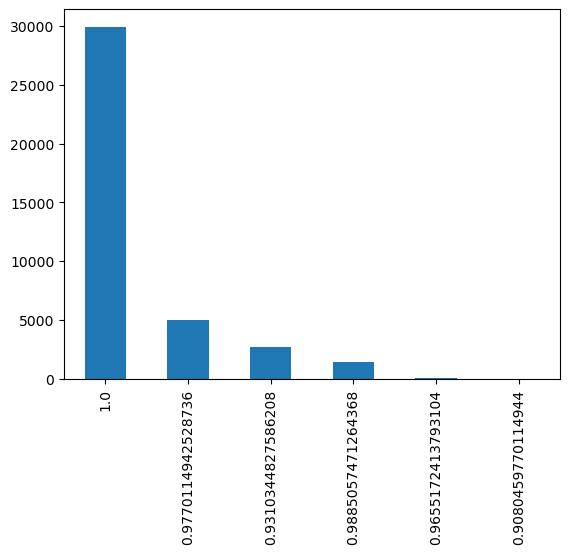

In [49]:
bar_graph('Des_IP', 0)

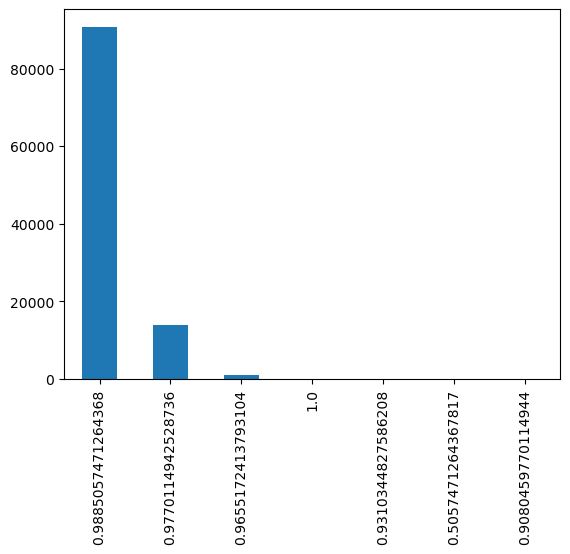

In [42]:
bar_graph('Des_IP', 1)

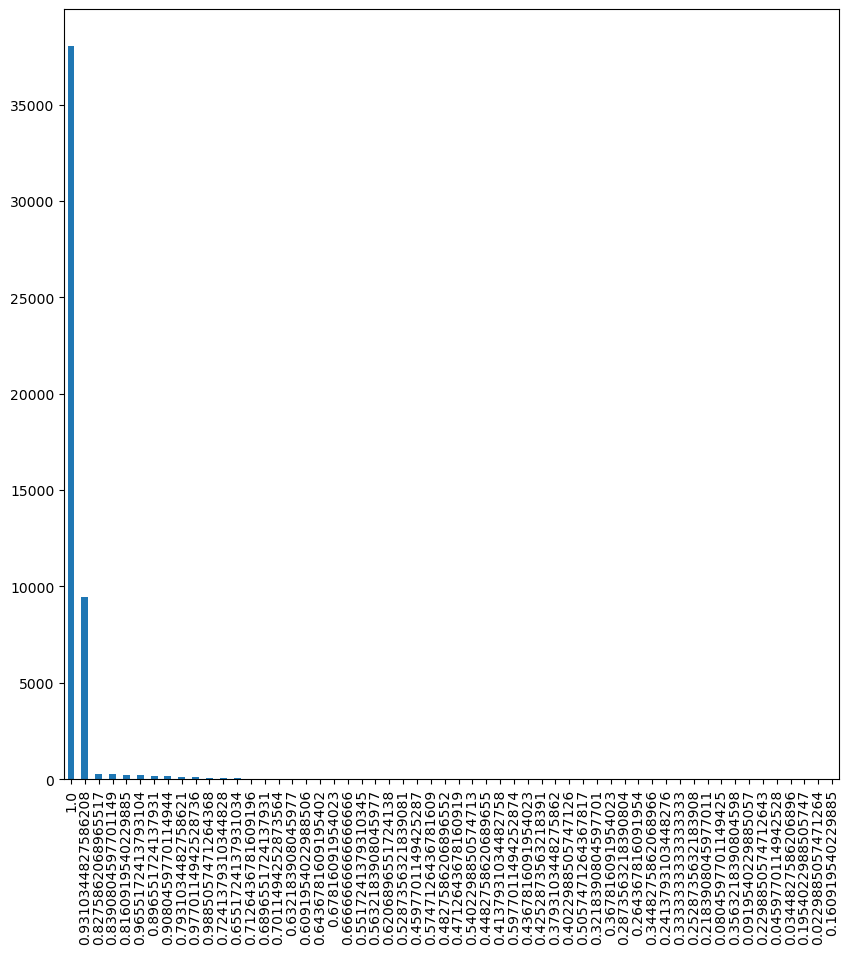

In [58]:
bar_graph('Des_IP', 2)

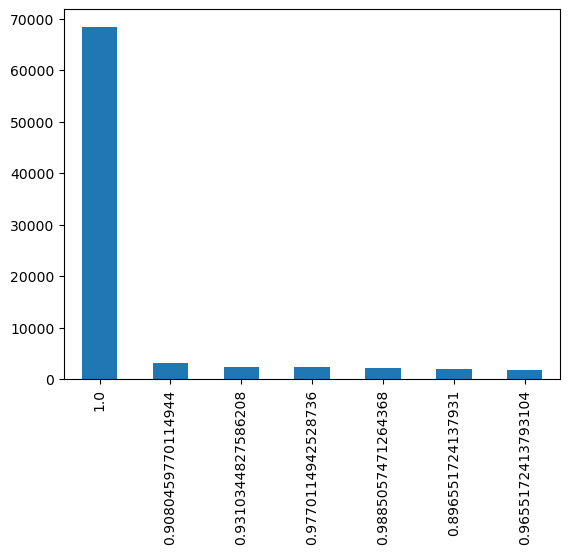

In [44]:
bar_graph('Des_IP', 3)

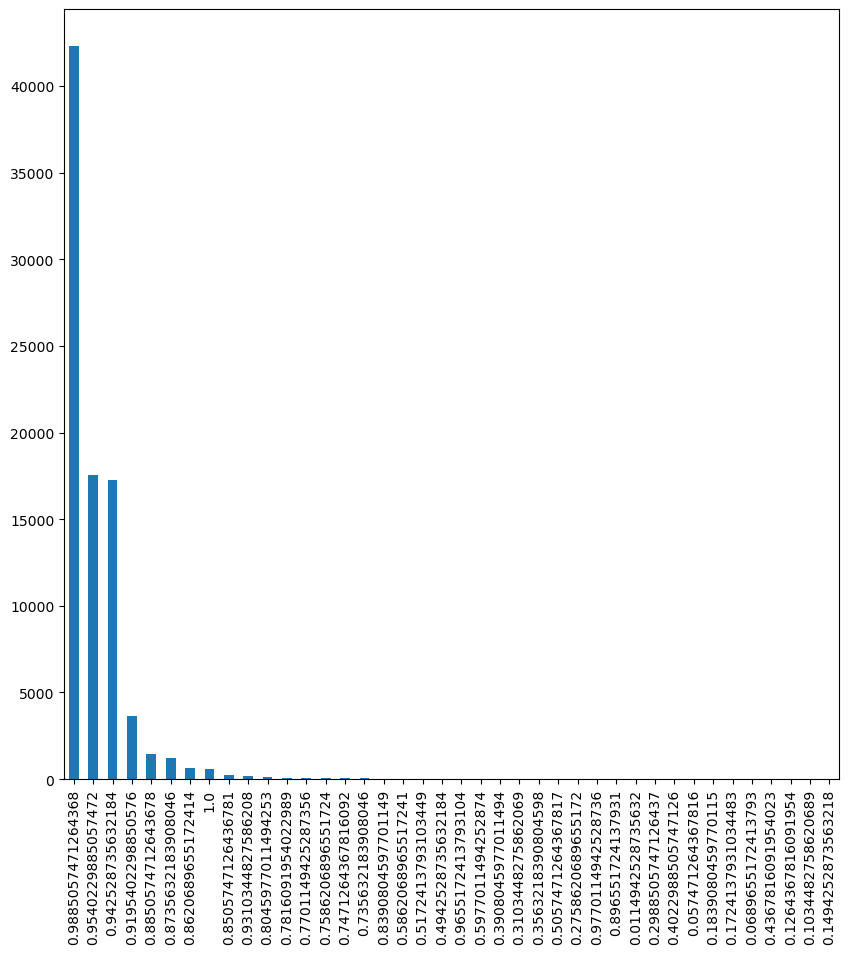

In [59]:
bar_graph('Des_IP', 4)

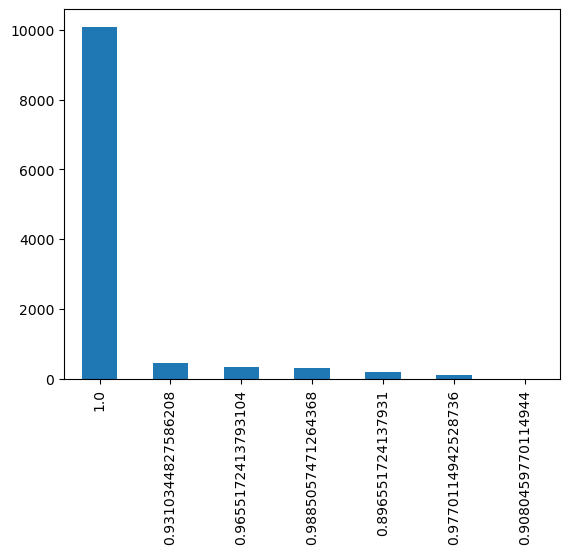

In [46]:
bar_graph('Des_IP', 5)

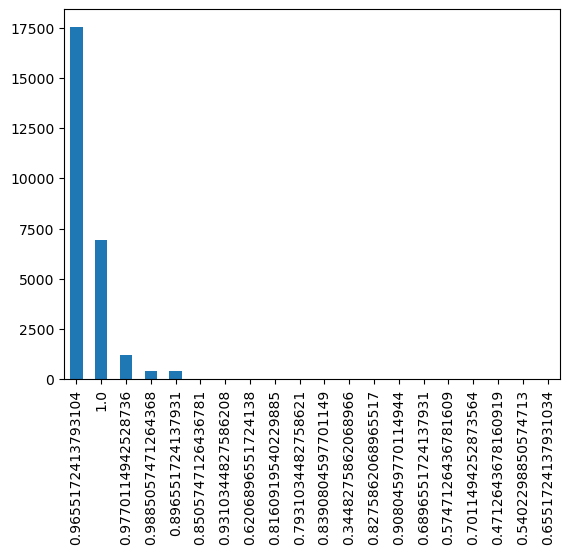

In [48]:
bar_graph('Des_IP', 6)

In [76]:
pd.Series(mydata.loc[mydata['Segment'] == 0].Des_IP.value_counts())

1.000000    29903
0.977011     5052
0.931034     2746
0.988506     1425
0.965517       68
0.908046        3
Name: Des_IP, dtype: int64

In [77]:
pd.Series(mydata.loc[mydata['Segment'] == 1].Des_IP.value_counts())

0.988506    90741
0.977011    13940
0.965517     1016
1.000000      132
0.931034       37
0.505747       11
0.908046        7
Name: Des_IP, dtype: int64

In [78]:
pd.Series(mydata.loc[mydata['Segment'] == 2].Des_IP.value_counts())

1.000000    38058
0.931034     9457
0.827586      242
0.839080      238
0.816092      189
0.965517      186
0.896552      147
0.908046      139
0.793103      107
0.977011      105
0.988506       54
0.724138       32
0.655172       28
0.712644       27
0.689655       27
0.701149       26
0.632184       25
0.609195       23
0.643678       23
0.678161       23
0.666667       21
0.551724       20
0.563218       19
0.620690       15
0.528736       15
0.459770       14
0.574713       14
0.482759       13
0.471264       13
0.540230       13
0.448276       13
0.413793       10
0.597701        9
0.436782        9
0.425287        6
0.379310        6
0.402299        6
0.505747        5
0.321839        4
0.367816        3
0.287356        3
0.264368        2
0.344828        2
0.241379        2
0.333333        2
0.252874        2
0.218391        2
0.080460        1
0.356322        1
0.091954        1
0.229885        1
0.045977        1
0.034483        1
0.195402        1
0.022989        1
0.160920  

In [79]:
pd.Series(mydata.loc[mydata['Segment'] == 3].Des_IP.value_counts())

1.000000    68346
0.908046     3201
0.931034     2399
0.977011     2286
0.988506     2048
0.896552     1932
0.965517     1684
Name: Des_IP, dtype: int64

In [80]:
pd.Series(mydata.loc[mydata['Segment'] == 4].Des_IP.value_counts())

0.988506    42325
0.954023    17528
0.942529    17273
0.919540     3648
0.885057     1429
0.873563     1211
0.862069      618
1.000000      566
0.850575      240
0.931034      191
0.804598      130
0.781609       88
0.770115       82
0.758621       46
0.747126       38
0.735632       31
0.839080       22
0.586207       18
0.517241       17
0.494253       13
0.965517       10
0.597701       10
0.390805        8
0.310345        3
0.356322        2
0.505747        2
0.275862        2
0.977011        2
0.896552        1
0.011494        1
0.298851        1
0.402299        1
0.057471        1
0.183908        1
0.172414        1
0.068966        1
0.436782        1
0.126437        1
0.103448        1
0.149425        1
Name: Des_IP, dtype: int64

In [81]:
pd.Series(mydata.loc[mydata['Segment'] == 5].Des_IP.value_counts())

1.000000    10079
0.931034      459
0.965517      345
0.988506      323
0.896552      205
0.977011      118
0.908046        2
Name: Des_IP, dtype: int64

In [82]:
pd.Series(mydata.loc[mydata['Segment'] == 6].Des_IP.value_counts())

0.965517    17543
1.000000     6920
0.977011     1211
0.988506      417
0.896552      389
0.850575       20
0.931034        2
0.620690        2
0.816092        2
0.793103        2
0.839080        2
0.344828        1
0.827586        1
0.908046        1
0.689655        1
0.574713        1
0.701149        1
0.471264        1
0.540230        1
0.655172        1
Name: Des_IP, dtype: int64

In [83]:
IP0 = pd.Series(mydata.loc[mydata['Segment'] == 0].Des_IP.value_counts().index)
IP1 = pd.Series(mydata.loc[mydata['Segment'] == 1].Des_IP.value_counts().index)
IP2 = pd.Series(mydata.loc[mydata['Segment'] == 2].Des_IP.value_counts().index)
IP3 = pd.Series(mydata.loc[mydata['Segment'] == 3].Des_IP.value_counts().index)
IP4 = pd.Series(mydata.loc[mydata['Segment'] == 4].Des_IP.value_counts().index)
IP5 = pd.Series(mydata.loc[mydata['Segment'] == 5].Des_IP.value_counts().index)
IP6 = pd.Series(mydata.loc[mydata['Segment'] == 6].Des_IP.value_counts().index)

In [93]:
only_IP2 = IP2[~IP2.isin(IP0) & ~IP2.isin(IP1) &~IP2.isin(IP3)&~IP2.isin(IP4)&~IP2.isin(IP5)&~IP2.isin(IP6) ]
print(only_IP2)
print(only_IP2.shape)

11    0.724138
13    0.712644
16    0.632184
17    0.609195
18    0.643678
19    0.678161
20    0.666667
21    0.551724
22    0.563218
24    0.528736
25    0.459770
27    0.482759
30    0.448276
31    0.413793
34    0.425287
35    0.379310
38    0.321839
39    0.367816
40    0.287356
41    0.264368
43    0.241379
44    0.333333
45    0.252874
46    0.218391
47    0.080460
49    0.091954
50    0.229885
51    0.045977
52    0.034483
53    0.195402
54    0.022989
55    0.160920
dtype: float64
(32,)


In [95]:
only_IP4 = IP4[~IP4.isin(IP0) & ~IP4.isin(IP1) &~IP4.isin(IP3)&~IP4.isin(IP2)&~IP4.isin(IP5)&~IP4.isin(IP6) ]
print(only_IP4)
print(only_IP4.shape)

1     0.954023
2     0.942529
3     0.919540
4     0.885057
5     0.873563
6     0.862069
10    0.804598
11    0.781609
12    0.770115
13    0.758621
14    0.747126
15    0.735632
17    0.586207
18    0.517241
19    0.494253
22    0.390805
23    0.310345
26    0.275862
29    0.011494
30    0.298851
32    0.057471
33    0.183908
34    0.172414
35    0.068966
37    0.126437
38    0.103448
39    0.149425
dtype: float64
(27,)
